In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import plotly.express as px
import json

In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [3]:
# import csv data from data folder
df_main = pd.read_csv('../data/bike_subscription_fact_cleaned.csv')

In [4]:
print('Number of rows:', df_main.shape[0])
df_main.head(2)

Number of rows: 909740


,id,fecha_compra,numero_cuenta_miembro,precio_compra,monto_acreditado,monto_subsidiado,total_pagado,id_estado,id_tipo_suscripcion,id_terminos_pago,id_estacion_compra,dia,mes,año,hora,hora_minuto_segundo,semana_año,mes_año,semana_mes,trimestre_año
0,78652,2022-11-01 00:00:00.521000-06:00,221077,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:00.521000,44,11,1,4
1,78653,2022-11-01 00:00:04.573000-06:00,222017,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:04.573000,44,11,1,4


In [5]:
# identificar si el dia es quincena o fin de mes
def identificar_quincena_fin_de_mes(dia):
    if dia == 15:
        return 'quincena'
    elif dia == 30 or dia == 31:
        return 'fin_de_mes'
    else:
        return 'otro_dia'
    
df_main['tipo_dia'] = df_main['dia'].apply(identificar_quincena_fin_de_mes)
df_main.head(2)

,id,fecha_compra,numero_cuenta_miembro,precio_compra,monto_acreditado,monto_subsidiado,total_pagado,id_estado,id_tipo_suscripcion,id_terminos_pago,...,dia,mes,año,hora,hora_minuto_segundo,semana_año,mes_año,semana_mes,trimestre_año,tipo_dia
0,78652,2022-11-01 00:00:00.521000-06:00,221077,449.14,0.0,0.0,521.0,5,4,0,...,1,11,2022,0,00:00:00.521000,44,11,1,4,otro_dia
1,78653,2022-11-01 00:00:04.573000-06:00,222017,449.14,0.0,0.0,521.0,5,4,0,...,1,11,2022,0,00:00:04.573000,44,11,1,4,otro_dia


In [6]:
# mostrar todas las columnas del dataframe
pd.set_option('display.max_columns', None)

In [7]:
df_main.head(2)

,id,fecha_compra,numero_cuenta_miembro,precio_compra,monto_acreditado,monto_subsidiado,total_pagado,id_estado,id_tipo_suscripcion,id_terminos_pago,id_estacion_compra,dia,mes,año,hora,hora_minuto_segundo,semana_año,mes_año,semana_mes,trimestre_año,tipo_dia
0,78652,2022-11-01 00:00:00.521000-06:00,221077,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:00.521000,44,11,1,4,otro_dia
1,78653,2022-11-01 00:00:04.573000-06:00,222017,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:04.573000,44,11,1,4,otro_dia


### Variables categoricas
- id_estado
- id_tipo_suscripcion
- id_terminos_pago: VACIO
- id_estacion_compra: VACIO
- dia
- mes
- año
- hora
- hora_minuto_segundo
- semana_año
- mes_año
- semana_mes
- trimestre_año
- tipo_dia

### Monto
- total_pagado

In [8]:
print('Unique de id_estado:', len(df_main['id_estado'].unique()), 'values', df_main['id_estado'].unique())
print('Unique de id_tipo_suscripcion:', len(df_main['id_tipo_suscripcion'].unique()), 'values', df_main['id_tipo_suscripcion'].unique())
print('Unique de id_terminos_pago:', len(df_main['id_terminos_pago'].unique()), 'values', df_main['id_terminos_pago'].unique())
print('Unique de id_estacion_compra:', len(df_main['id_estacion_compra'].unique()), 'values', df_main['id_estacion_compra'].unique())
print('Unique de dia:', len(df_main['dia'].unique()), 'values', df_main['dia'].unique())
print('Unique de mes:', len(df_main['mes'].unique()), 'values', df_main['mes'].unique())
print('Unique de año:', len(df_main['año'].unique()), 'values', df_main['año'].unique())
print('Unique de hora:', len(df_main['hora'].unique()), 'values', df_main['hora'].unique())
print('Unique de semana_año:', len(df_main['semana_año'].unique()), 'values', df_main['semana_año'].unique())
print('Unique de mes_año:', len(df_main['mes_año'].unique()), 'values', df_main['mes_año'].unique())
print('Unique de semana_mes:', len(df_main['semana_mes'].unique()), 'values', df_main['semana_mes'].unique())
print('Unique de trimestre_año:', len(df_main['trimestre_año'].unique()), 'values', df_main['trimestre_año'].unique())
print('Unique de tipo_dia:', len(df_main['tipo_dia'].unique()), 'values', df_main['tipo_dia'].unique())

Unique de id_estado: 4 values [5 3 0 4]
Unique de id_tipo_suscripcion: 9 values [ 4  1  3  2  7  8  9 10 11]
Unique de id_terminos_pago: 1 values [0]
Unique de id_estacion_compra: 1 values [nan]
Unique de dia: 31 values [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique de mes: 12 values [11 12  1  2  3  4  5  6  7  8  9 10]
Unique de año: 4 values [2022 2023 2024 2025]
Unique de hora: 24 values [ 0  1  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  3  2  4]
Unique de semana_año: 52 values [44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43]
Unique de mes_año: 12 values [11 12  1  2  3  4  5  6  7  8  9 10]
Unique de semana_mes: 5 values [1 2 3 4 5]
Unique de trimestre_año: 4 values [4 1 2 3]
Unique de tipo_dia: 3 values ['otro_dia' 'quincena' 'fin_de_mes']


In [9]:
df_main.describe().round(2)

,id,precio_compra,monto_acreditado,monto_subsidiado,total_pagado,id_estado,id_tipo_suscripcion,id_terminos_pago,id_estacion_compra,dia,mes,año,hora,semana_año,mes_año,semana_mes,trimestre_año
count,909740.00,909740.00,909740.00,909740.0,909740.00,909740.00,909740.00,909740.0,0.0,909740.00,909740.00,909740.00,909740.00,909740.00,909740.00,909740.00,909740.00
mean,534022.01,313.81,1.47,0.0,358.62,3.98,2.77,0.0,NaN,15.71,6.39,2024.00,13.32,25.93,6.39,2.70,2.47
std,262856.88,179.23,29.79,0.0,205.73,2.01,1.57,0.0,NaN,8.94,3.53,0.84,4.83,15.36,3.53,1.29,1.16
min,78652.00,0.00,0.00,0.0,0.00,0.00,1.00,0.0,NaN,1.00,1.00,2022.00,0.00,1.00,1.00,1.00,1.00
25%,306389.75,106.03,0.00,0.0,122.99,5.00,1.00,0.0,NaN,8.00,3.00,2023.00,10.00,12.00,3.00,2.00,1.00
50%,534056.50,449.14,0.00,0.0,521.00,5.00,4.00,0.0,NaN,16.00,6.00,2024.00,13.00,25.00,6.00,3.00,2.00
75%,761659.25,469.83,0.00,0.0,545.00,5.00,4.00,0.0,NaN,23.00,10.00,2025.00,17.00,40.00,10.00,4.00,4.00
max,989263.00,7200.00,2154.31,0.0,8352.00,5.00,11.00,0.0,NaN,31.00,12.00,2025.00,23.00,52.00,12.00,5.00,4.00


## Analisis univariado

#### id_estado

- 0 (Active). Subscription is active.
- 2 (To activate). Subscription is purchased but has not yet been
activated. The activation date is unknown.
- 3 (Cancelled).Subscription has been cancelled and cannot be
used.
- 4 (Pending). Subscription is purchased but has not yet been
activated.
- 5 (Expired). Subscription was once active and has reached the
end of its validity period

Value counts de id_estado:
Values Active(0): 185195
Values To active(2): 0
Values Cancelled(3): 2457
Values Pending(4): 689
Values Expired(5): 721399


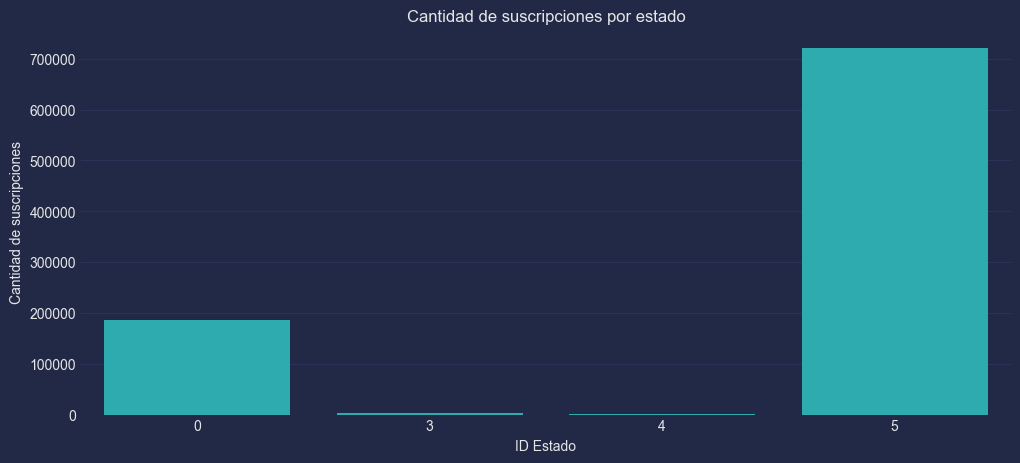

In [10]:
print('Value counts de id_estado:')
print('Values Active(0):', df_main['id_estado'].value_counts().get(0, 0))
print('Values To active(2):', df_main['id_estado'].value_counts().get(2, 0))
print('Values Cancelled(3):', df_main['id_estado'].value_counts().get(3, 0))
print('Values Pending(4):', df_main['id_estado'].value_counts().get(4, 0))
print('Values Expired(5):', df_main['id_estado'].value_counts().get(5, 0))

plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='id_estado')
plt.title('Cantidad de suscripciones por estado')
plt.xlabel('ID Estado')
plt.ylabel('Cantidad de suscripciones')
plt.show()


- Values Expired(5):    186,720
- Values Active(0):     170,000
- Values Cancelled(3):  594
- Values Pending(4):    3
- Values To active(2):  0

### id_tipo_suscripcion

Value counts de id_tipo_suscripcion:
id_tipo_suscripcion
4     488663
1     352606
2      45378
3      14637
9       5565
10      2873
11        12
7          4
8          2
Name: count, dtype: int64


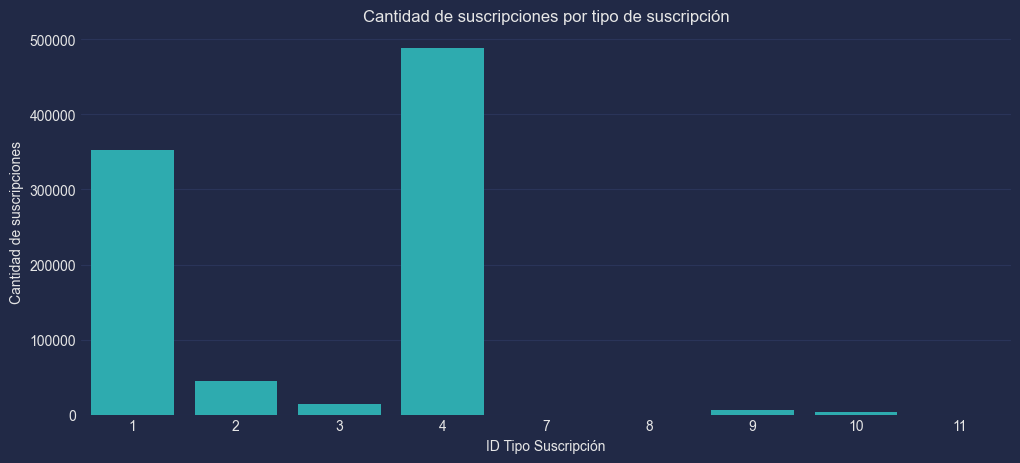

In [11]:
print('Value counts de id_tipo_suscripcion:')
print(df_main['id_tipo_suscripcion'].value_counts())

plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='id_tipo_suscripcion')
# cambiar color de la linea kde a purpura
plt.title('Cantidad de suscripciones por tipo de suscripción')
plt.xlabel('ID Tipo Suscripción')
plt.ylabel('Cantidad de suscripciones')
plt.show()

### dia

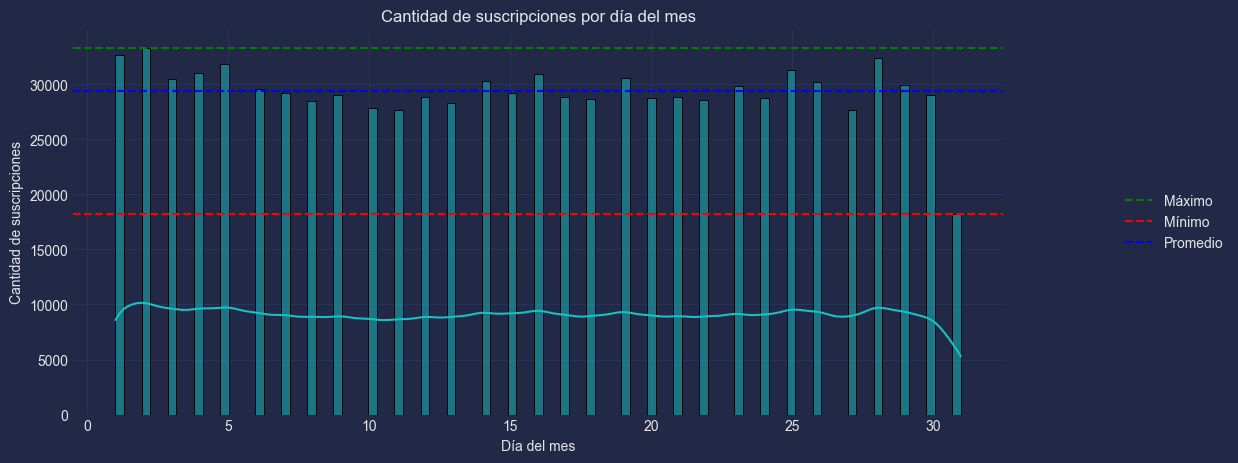

In [12]:
plt.figure(figsize=(12, 5))
sns.histplot(df_main['dia'], kde=True)
plt.title('Cantidad de suscripciones por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de suscripciones')
# linea del maximo
max_count = df_main['dia'].value_counts().max()
plt.axhline(max_count, color='green', linestyle='--', label='Máximo')
min_count = df_main['dia'].value_counts().min()
plt.axhline(min_count, color='red', linestyle='--', label='Mínimo')
# linia del promedio
mean_count = df_main['dia'].value_counts().mean()
plt.axhline(mean_count, color='blue', linestyle='--', label='Promedio')
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [13]:
# agrupar por dia y contar la cantidad de suscripciones
df_dia_counts = df_main.groupby('dia').size().reset_index(name='cantidad_suscripciones')
df_dia_counts.describe().round(2)

,dia,cantidad_suscripciones
count,31.00,31.00
mean,16.00,29346.45
std,9.09,2529.97
min,1.00,18203.00
25%,8.50,28697.50
50%,16.00,29164.00
75%,23.50,30539.00
max,31.00,33292.00


### mes

Text(0, 0.5, 'Cantidad de suscripciones')

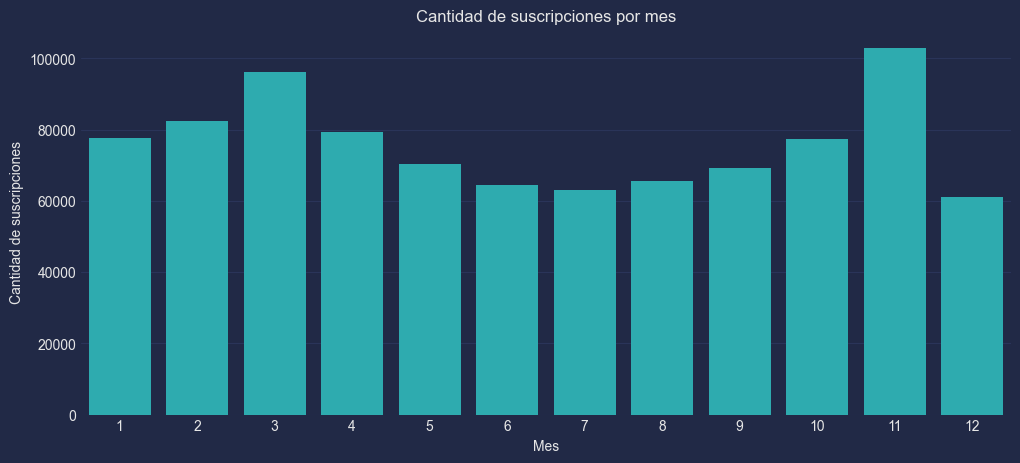

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='mes')
plt.title('Cantidad de suscripciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de suscripciones')

### año

Text(0, 0.5, 'Cantidad de suscripciones')

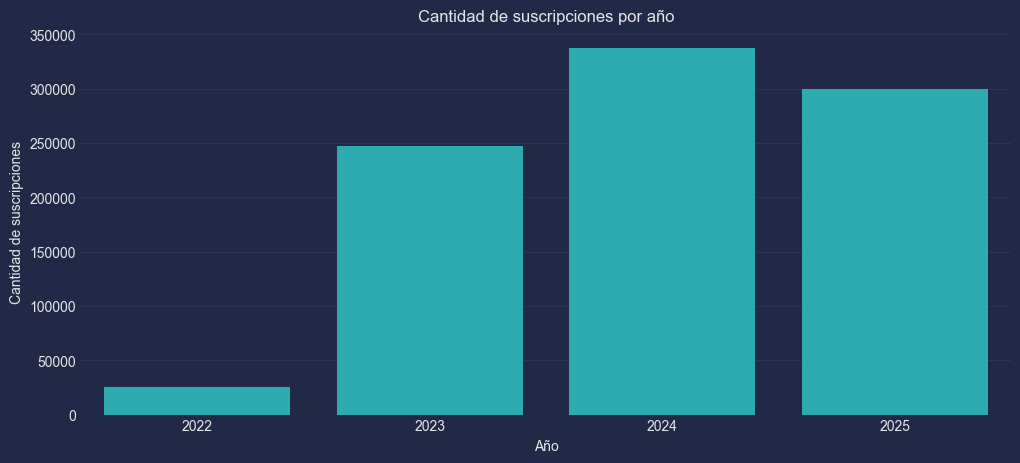

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='año')
plt.title('Cantidad de suscripciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de suscripciones')

### hora

Text(0, 0.5, 'Cantidad de suscripciones')

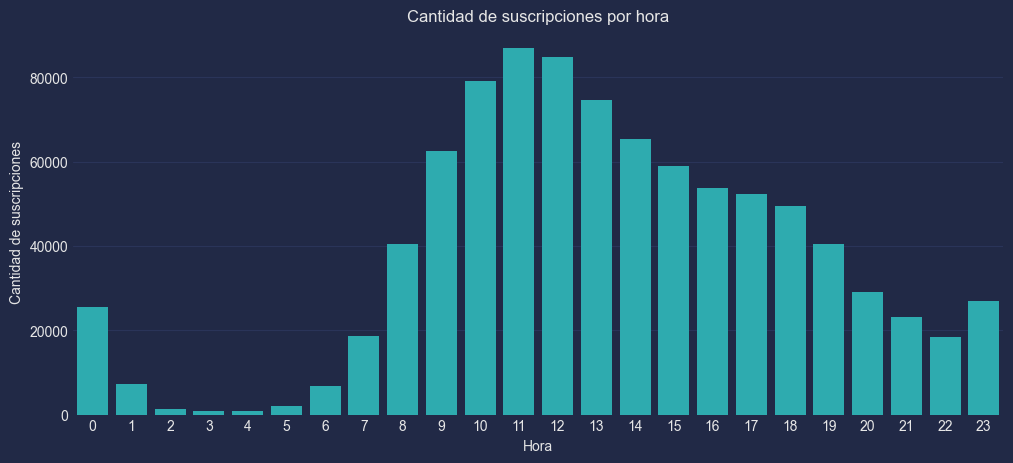

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='hora')
plt.title('Cantidad de suscripciones por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de suscripciones')

### semana_año

Text(0, 0.5, 'Cantidad de suscripciones')

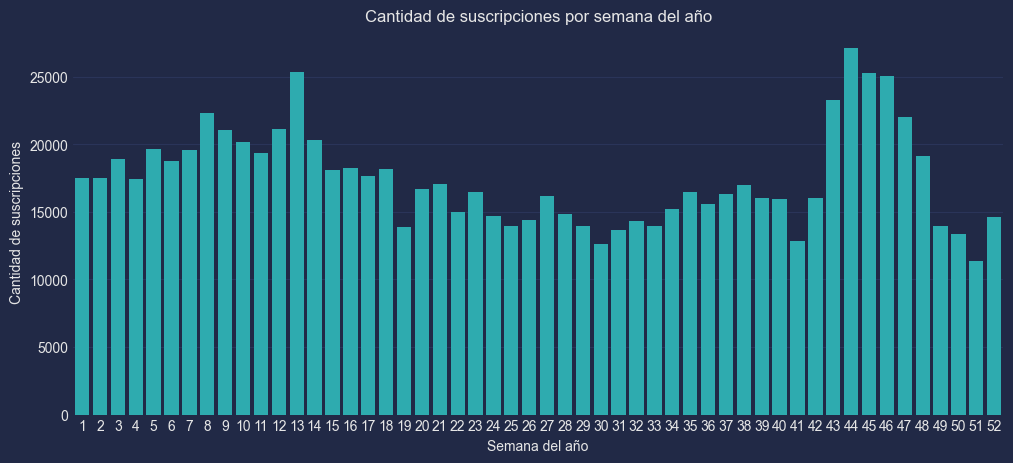

In [17]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='semana_año')
plt.title('Cantidad de suscripciones por semana del año')
plt.xlabel('Semana del año')
plt.ylabel('Cantidad de suscripciones')

### semana_mes

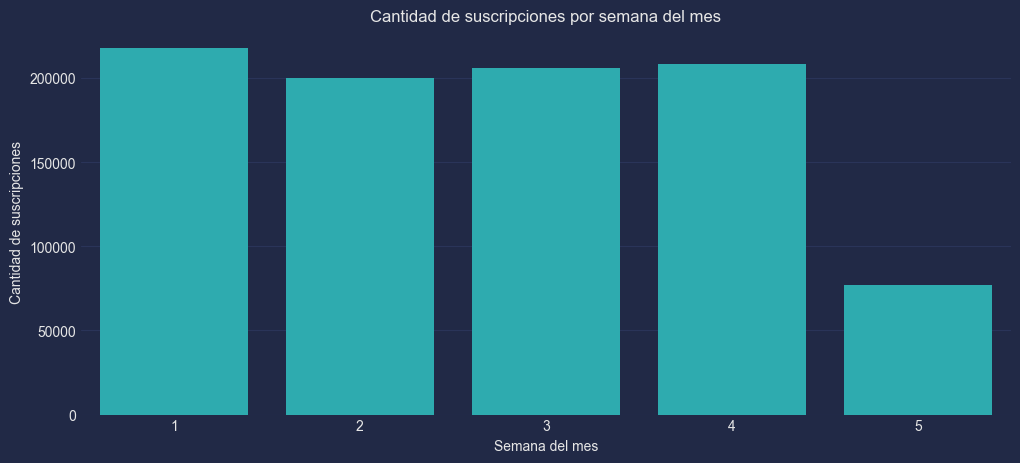

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='semana_mes')
plt.title('Cantidad de suscripciones por semana del mes')
plt.xlabel('Semana del mes')
plt.ylabel('Cantidad de suscripciones')
plt.show()

### trimestre_año

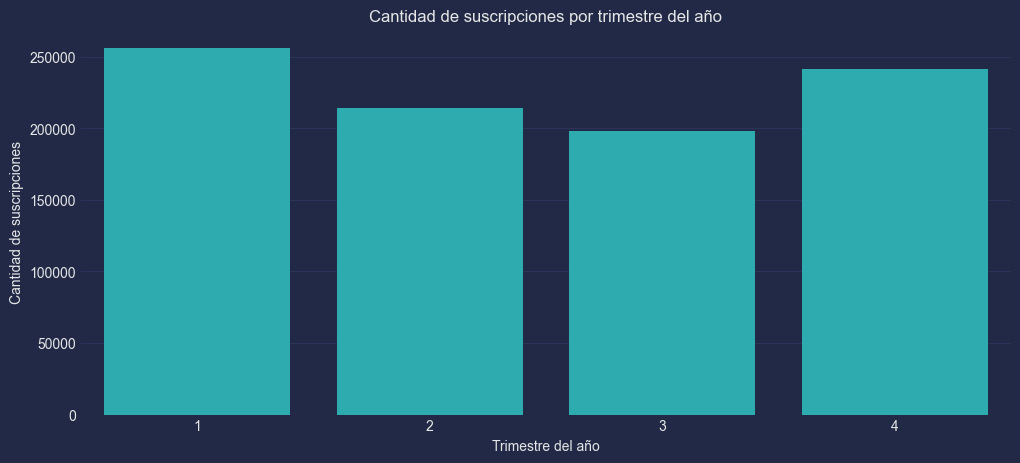

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_main, x='trimestre_año')
plt.title('Cantidad de suscripciones por trimestre del año')
plt.xlabel('Trimestre del año')
plt.ylabel('Cantidad de suscripciones')
plt.show()

### tipo_dia

In [20]:
# filtrar los datos para tipo_dia diferente de 'otro_dia'
df_tipo_dia = df_main[df_main['tipo_dia'] != 'otro_dia']

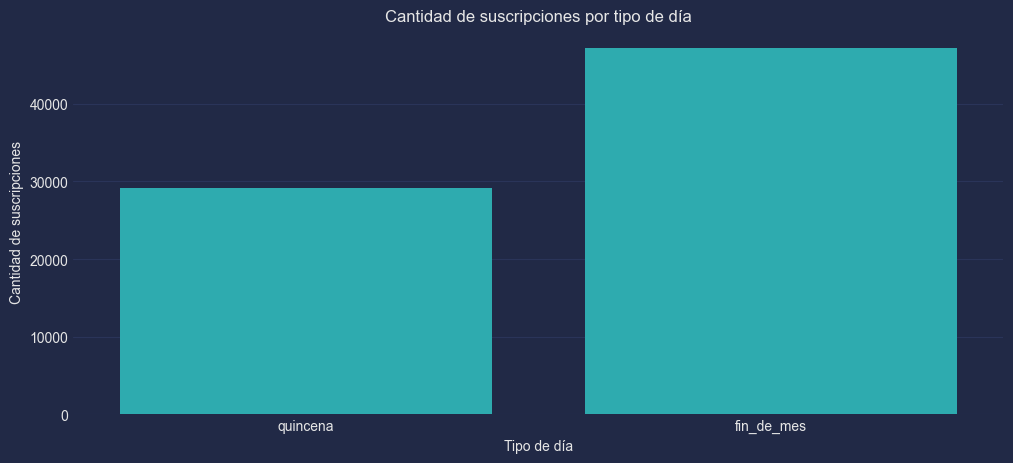

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_tipo_dia, x='tipo_dia')
plt.title('Cantidad de suscripciones por tipo de día')
plt.xlabel('Tipo de día')
plt.ylabel('Cantidad de suscripciones')
plt.show()

## Analisis bivariado

### Variables categoricas
- id_estado
- id_tipo_suscripcion
- id_terminos_pago: VACIO
- id_estacion_compra: VACIO
- dia
- mes
- año
- hora
- hora_minuto_segundo
- semana_año
- mes_año
- semana_mes
- trimestre_año
- tipo_dia

### Monto
- total_pagado

### Correlaciones

- ¿Existe correlación id_tipo_suscripcion con el total_pagado?
- ¿Existe una correlacion dia con total_pagado?
- ¿Existe una correlacion mes con total_pagado?
- ¿Existe una correlacion hora con total_pagado?
- ¿Existe una correlacion semana_mes con total_pagado?

In [22]:
df_main.head(2)

,id,fecha_compra,numero_cuenta_miembro,precio_compra,monto_acreditado,monto_subsidiado,total_pagado,id_estado,id_tipo_suscripcion,id_terminos_pago,id_estacion_compra,dia,mes,año,hora,hora_minuto_segundo,semana_año,mes_año,semana_mes,trimestre_año,tipo_dia
0,78652,2022-11-01 00:00:00.521000-06:00,221077,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:00.521000,44,11,1,4,otro_dia
1,78653,2022-11-01 00:00:04.573000-06:00,222017,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:04.573000,44,11,1,4,otro_dia


In [23]:
df_main['dia_mes_año'] = df_main['dia'].astype(str) + '-' + df_main['mes'].astype(str) + '-' + df_main['año'].astype(str)
df_main['mes_año'] = df_main['mes'].astype(str) + '-' + df_main['año'].astype(str)
df_main.head(2)

,id,fecha_compra,numero_cuenta_miembro,precio_compra,monto_acreditado,monto_subsidiado,total_pagado,id_estado,id_tipo_suscripcion,id_terminos_pago,id_estacion_compra,dia,mes,año,hora,hora_minuto_segundo,semana_año,mes_año,semana_mes,trimestre_año,tipo_dia,dia_mes_año
0,78652,2022-11-01 00:00:00.521000-06:00,221077,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:00.521000,44,11-2022,1,4,otro_dia,1-11-2022
1,78653,2022-11-01 00:00:04.573000-06:00,222017,449.14,0.0,0.0,521.0,5,4,0,NaN,1,11,2022,0,00:00:04.573000,44,11-2022,1,4,otro_dia,1-11-2022


In [24]:
# agrupar por dia_mes_año y año y contar la cantidad de suscripciones
df_mes_año_counts = df_main.groupby('dia_mes_año').size().reset_index(name='cantidad_suscripciones')

df_mes_año_counts['fecha_dt'] = pd.to_datetime(df_mes_año_counts['dia_mes_año'], format='%d-%m-%Y')

# 4. Ordenar el DataFrame por la nueva columna de fecha
df_sorted = df_mes_año_counts.sort_values(by='fecha_dt')

df_sorted

,dia_mes_año,cantidad_suscripciones,fecha_dt
6,1-11-2022,463,2022-11-01
413,2-11-2022,498,2022-11-02
817,3-11-2022,403,2022-11-03
908,4-11-2022,390,2022-11-04
945,5-11-2022,1474,2022-11-05
...,...,...,...
601,24-11-2025,745,2025-11-24
638,25-11-2025,759,2025-11-25
675,26-11-2025,749,2025-11-26
712,27-11-2025,769,2025-11-27


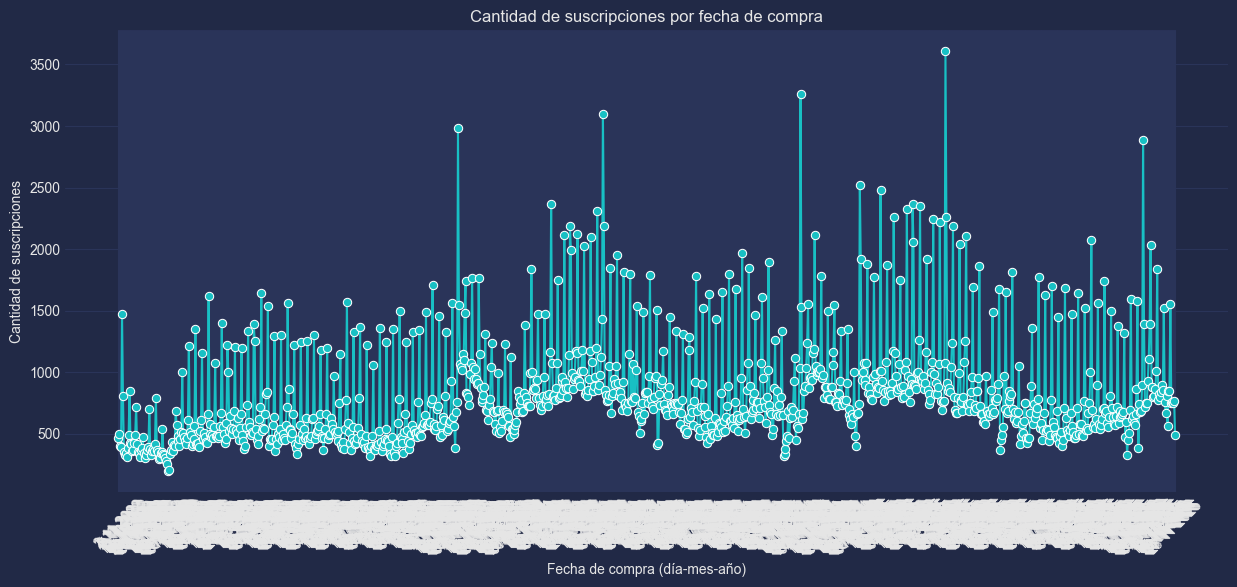

In [25]:
# graficar de linea por fecha_compra
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_sorted, x='dia_mes_año', y='cantidad_suscripciones', marker='o')
plt.title('Cantidad de suscripciones por fecha de compra')
plt.xlabel('Fecha de compra (día-mes-año)')
plt.ylabel('Cantidad de suscripciones')
plt.xticks(rotation=45)
plt.show()

In [28]:
columna_fecha = df_sorted.columns[0]  # Detecta automáticamente la primera columna
df_sorted[columna_fecha] = pd.to_datetime(df_sorted[columna_fecha], format='%d-%m-%Y')

# 3. Crear el gráfico de línea interactivo
fig = px.bar(df_sorted, 
              x=columna_fecha, 
              y='cantidad_suscripciones', 
              title='Evolución de Suscripciones en el Tiempo',
              labels={columna_fecha: 'Fecha', 'cantidad_suscripciones': 'Suscripciones'}) # markers=True añade puntos a la línea

# 4. Personalizar el diseño (opcional)
fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Cantidad de Suscripciones",
    template="plotly_white" # Un tema limpio
)

# 5. Mostrar el gráfico
fig.show()